In [163]:
from random import choice, shuffle
import seaborn as sns

class Academia(object):
    def __init__(self, halters_max_w):
        self.halteres = [i for i in range(10, halters_max_w+1) if (i%2)==0]
        self.porta_halteres = {i:i for i in self.halteres}

    def organiza_halteres(self):
        self.porta_halteres = {i:i for i in self.halteres}

    def halteres_disponiveis(self):
        return [halt for halt in self.porta_halteres.values() if halt!=0]
    
    def espacos_disponiveis(self):
        return [pos for (pos,halt) in self.porta_halteres.items() if halt==0]
    
    def pegar_hater(self, peso):
        halt_pos = list(self.porta_halteres.values()).index(peso)
        key_halt = list(self.porta_halteres.keys())[halt_pos]
        self.porta_halteres[key_halt] = 0
        return peso

    def devolver_halter(self, pos, peso):
        self.porta_halteres[pos]=peso

    def calcular_caos(self):
        num_caos = [i for (i, j) in self.porta_halteres.items() if (i!=j)]
        return len(num_caos)/len(self.halteres)



In [164]:
class Usuario:
    def __init__(self, tipo, academia):
        self.tipo = tipo # true:normal | false:bagunceiro
        self.academia = academia 
        self.peso = 0 
    
    def iniciar_treino(self):
        pesos = self.academia.halteres_disponiveis()
        self.peso = choice(pesos) 
        self.academia.pegar_hater(self.peso)

    def finalizar_treino(self):
        espacos = self.academia.espacos_disponiveis()
        if self.tipo:
            if self.peso in espacos:
                self.academia.devolver_halter(self.peso, self.peso)
            else:
                self.academia.devolver_halter(choice(espacos), self.peso)
        else:
                self.academia.devolver_halter(choice(espacos), self.peso)
        self.peso = 0



In [165]:
academia = Academia(100)
users = list()
users += [Usuario(True, academia) for _ in range(20)]
users += [Usuario(False,academia) for _ in range(2)]

shuffle(users)

list_chaos = []
for __ in range(50):
    for _ in range(10):
        shuffle(users)
        for user in users:
            user.iniciar_treino()
        for user in users:   
            user.finalizar_treino()
    list_chaos+= [academia.calcular_caos()]



print(sum(list_chaos)/len(list_chaos))

0.5686956521739129


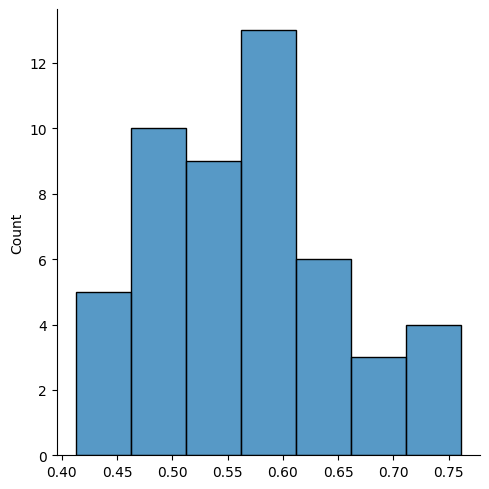

In [166]:


sns.displot(list_chaos)

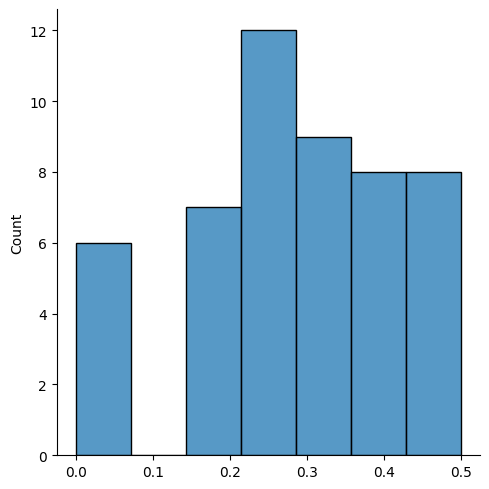

In [167]:
academia = Academia(36)
users = list()
users += [Usuario(True, academia) for _ in range(10)]
users += [Usuario(False,academia) for _ in range(1)]

shuffle(users)

list_chaos = []
for __ in range(50):
    for _ in range(10):
        shuffle(users)
        for user in users:
            user.iniciar_treino()
        for user in users:   
            user.finalizar_treino()
    list_chaos+= [academia.calcular_caos()]

sns.displot(list_chaos)
